In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
df = pd.read_csv("Data/Part_1_Crime_Data.csv",
                 low_memory=False)
## Converting crimedatetime and coercing errors
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], errors='coerce')
df = df.dropna(subset=['CrimeDateTime'])
## setting and sorting the index
df = df.set_index("CrimeDateTime")
df = df.sort_index()
df.head(3)

,X,Y,RowID,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
CrimeDateTime,,,,,,,,,,,,,,,,,,,,,,
1920-06-18 01:30:01+00:00,-76.566719,39.291959,529201,22F05949,3AO,ROBBERY,NaN,PERSONAL_WEAPONS,223.0,M,20.0,WHITE,HISPANIC_OR_LATINO,3700 LEVERTON AVE,SOUTHEAST,NaN,BALTIMORE HIGHLANDS,39.291959,-76.566719,"(39.291958801114234,-76.566719001516489)",NaN,1
1922-06-22 13:00:01+00:00,-76.612378,39.276740,529200,22F07001,4E,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,942.0,M,58.0,WHITE,NaN,1100 LIGHT ST,SOUTHERN,NaN,FEDERAL HILL,39.276740,-76.612378,"(39.276739999999997,-76.612378000000007)",NaN,1
1963-10-30 00:00:01+00:00,-76.702653,39.326879,529199,17K02992,2A,RAPE,NaN,OTHER,622.0,F,32.0,BLACK_OR_AFRICAN_AMERICAN,NaN,3100 FERNDALE AVE,NORTHWEST,NaN,HOWARD PARK,39.326879,-76.702653,"(39.326879,-76.702653)",ROW/TOWNHOUSE-OCC,1


In [3]:
## baltimore is in eastern time zone,but can just use tz-naive index by choosing None
df = df.tz_convert(None)
df.head(3)

,X,Y,RowID,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
CrimeDateTime,,,,,,,,,,,,,,,,,,,,,,
1920-06-18 01:30:01,-76.566719,39.291959,529201,22F05949,3AO,ROBBERY,NaN,PERSONAL_WEAPONS,223.0,M,20.0,WHITE,HISPANIC_OR_LATINO,3700 LEVERTON AVE,SOUTHEAST,NaN,BALTIMORE HIGHLANDS,39.291959,-76.566719,"(39.291958801114234,-76.566719001516489)",NaN,1
1922-06-22 13:00:01,-76.612378,39.276740,529200,22F07001,4E,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,942.0,M,58.0,WHITE,NaN,1100 LIGHT ST,SOUTHERN,NaN,FEDERAL HILL,39.276740,-76.612378,"(39.276739999999997,-76.612378000000007)",NaN,1
1963-10-30 00:00:01,-76.702653,39.326879,529199,17K02992,2A,RAPE,NaN,OTHER,622.0,F,32.0,BLACK_OR_AFRICAN_AMERICAN,NaN,3100 FERNDALE AVE,NORTHWEST,NaN,HOWARD PARK,39.326879,-76.702653,"(39.326879,-76.702653)",ROW/TOWNHOUSE-OCC,1


In [4]:
## Drop extra columns not needed
drop_cols = ['RowID','Post','GeoLocation', 'Location']
df = df.drop(columns=drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600848 entries, 1920-06-18 01:30:01 to 2024-01-31 23:30:34
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                599775 non-null  float64
 1   Y                599775 non-null  float64
 2   CCNumber         600848 non-null  object 
 3   CrimeCode        600848 non-null  object 
 4   Description      600848 non-null  object 
 5   Inside_Outside   0 non-null       float64
 6   Weapon           148967 non-null  object 
 7   Gender           504340 non-null  object 
 8   Age              484253 non-null  float64
 9   Race             578291 non-null  object 
 10  Ethnicity        73189 non-null   object 
 11  Old_District     563497 non-null  object 
 12  New_District     29337 non-null   object 
 13  Neighborhood     592431 non-null  object 
 14  Latitude         599775 non-null  float64
 15  Longitude        599775 non-null  float64
 16  Prem

Feature Engineering & Initial EDA

In [5]:
## saving just the date (no time) as a column
df['Date'] = df.index.date
# could also use .strftime + pd.to_datetime
# df['Date'] = pd.to_datetime(df.index.strftime('%Y-%m-%d'))
df.head(3)

,X,Y,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,Old_District,New_District,Neighborhood,Latitude,Longitude,PremiseType,Total_Incidents,Date
CrimeDateTime,,,,,,,,,,,,,,,,,,,
1920-06-18 01:30:01,-76.566719,39.291959,22F05949,3AO,ROBBERY,NaN,PERSONAL_WEAPONS,M,20.0,WHITE,HISPANIC_OR_LATINO,SOUTHEAST,NaN,BALTIMORE HIGHLANDS,39.291959,-76.566719,NaN,1,1920-06-18
1922-06-22 13:00:01,-76.612378,39.276740,22F07001,4E,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,M,58.0,WHITE,NaN,SOUTHERN,NaN,FEDERAL HILL,39.276740,-76.612378,NaN,1,1922-06-22
1963-10-30 00:00:01,-76.702653,39.326879,17K02992,2A,RAPE,NaN,OTHER,F,32.0,BLACK_OR_AFRICAN_AMERICAN,NaN,NORTHWEST,NaN,HOWARD PARK,39.326879,-76.702653,ROW/TOWNHOUSE-OCC,1,1963-10-30


In [6]:
# year
## Engineering Features using components of the date/time
df['Year']  = df.index.year

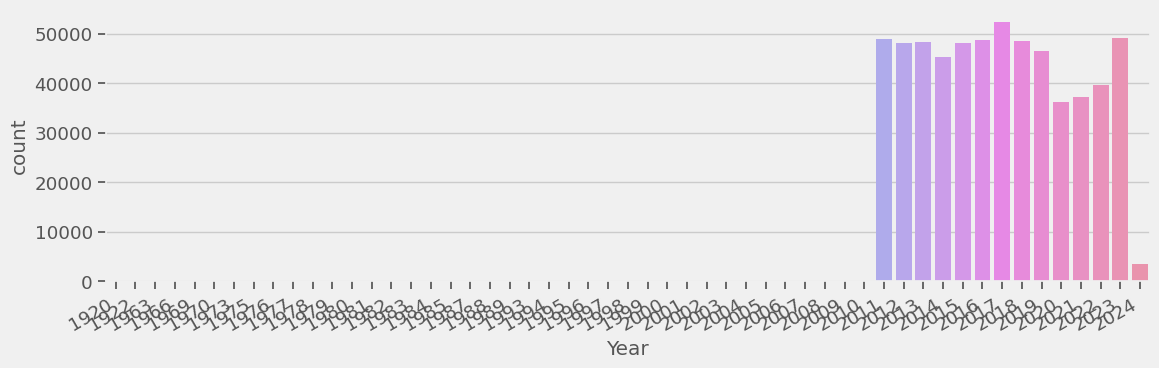

In [7]:
## Visualize years
ax = sns.countplot(data=df, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

In [8]:
df['Year'].value_counts().sort_index(ascending = False).head(15)

2024     3420
2023    49217
2022    39715
2021    37132
2020    36291
2019    46605
2018    48598
2017    52295
2016    48675
2015    48072
2014    45227
2013    48328
2012    48142
2011    48966
2010       27
Name: Year, dtype: int64

In [9]:
## keeping data from yr 2011 to present
df = df.loc['2011':'2022'].copy()

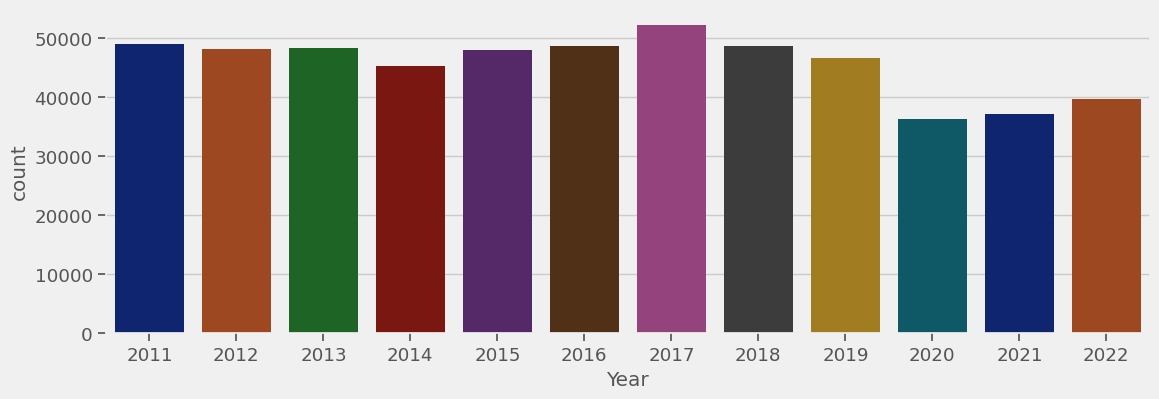

In [10]:
## visualizing again with years removed
sns.countplot(data=df, x='Year',palette='dark');

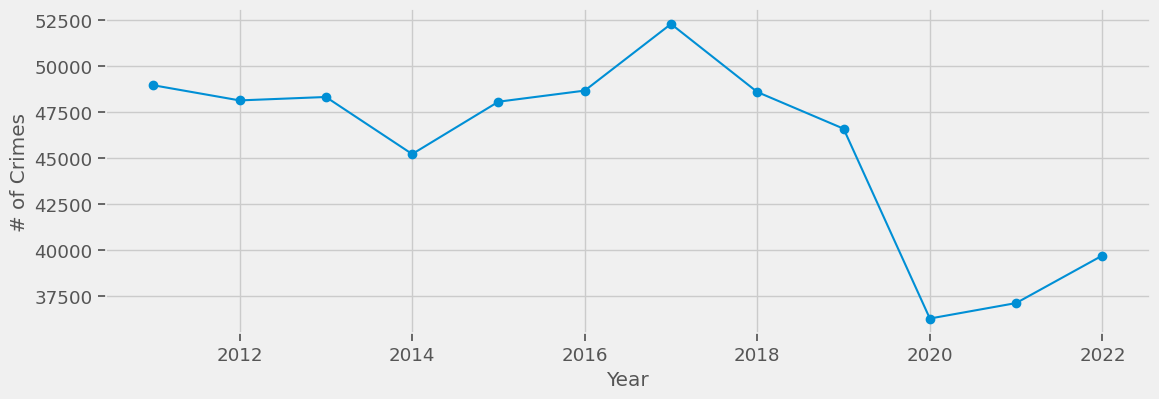

In [11]:
## save year counts
year_counts = df['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

In [12]:
# month
## Extracting the Month
df['Month'] = df.index.month
df['MonthName'] = df.index.month_name()
df.head(3)

,X,Y,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,Old_District,New_District,Neighborhood,Latitude,Longitude,PremiseType,Total_Incidents,Date,Year,Month,MonthName
CrimeDateTime,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,-76.661518,39.295633,11A01120,6E,LARCENY,NaN,NaN,M,44.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,NaN,MOSHER,39.295633,-76.661518,STREET,1,2011-01-01,2011,1,January
2011-01-01,-76.613380,39.276987,11A01127,6G,LARCENY,NaN,NaN,F,26.0,WHITE,NaN,SOUTHERN,NaN,FEDERAL HILL,39.276987,-76.613380,TAVERN/NIGHT CLUB,1,2011-01-01,2011,1,January
2011-01-01,-76.639291,39.298964,19I04219,2A,RAPE,NaN,OTHER,M,16.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,NaN,HARLEM PARK,39.298964,-76.639291,NaN,1,2011-01-01,2011,1,January


In [13]:
# saving lookup for number vs name
unique_months = df.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

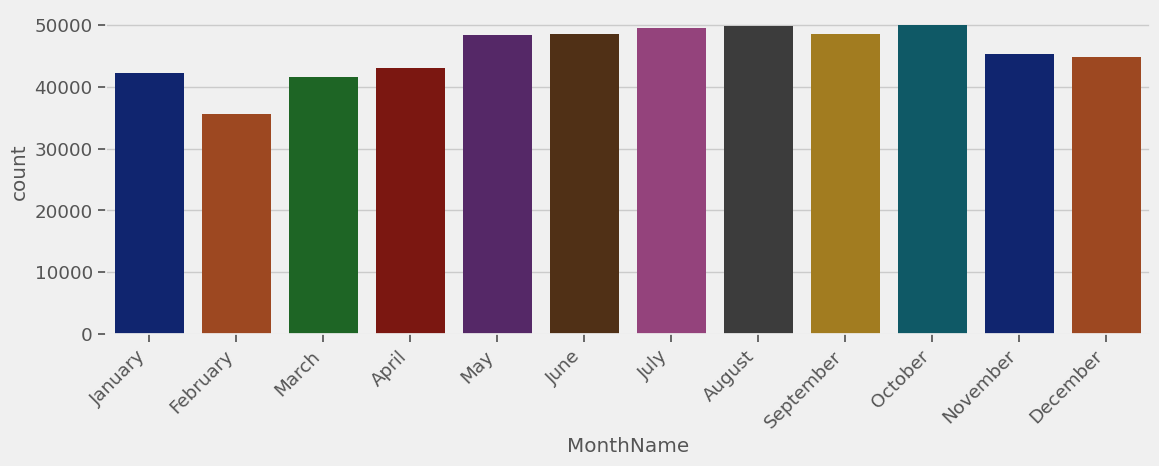

In [14]:
ax = sns.countplot(data=df, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

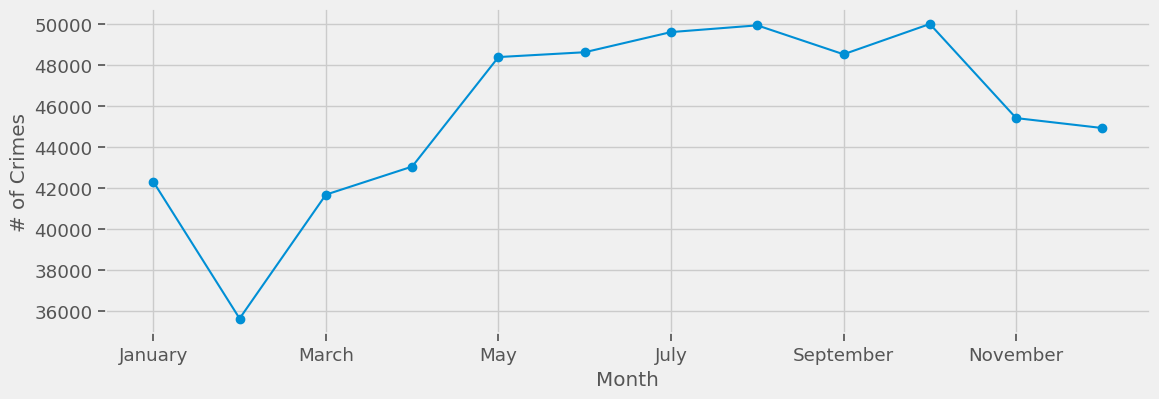

In [15]:
## save month counts
month_counts = df['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

In [16]:
# day of the week
## adding day of week as both number & name
df['DayOfWeek'] = df.index.day_name()
df['DayNum'] = df.index.day_of_week
df.head(3)

,X,Y,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,Old_District,New_District,Neighborhood,Latitude,Longitude,PremiseType,Total_Incidents,Date,Year,Month,MonthName,DayOfWeek,DayNum
CrimeDateTime,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,-76.661518,39.295633,11A01120,6E,LARCENY,NaN,NaN,M,44.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,NaN,MOSHER,39.295633,-76.661518,STREET,1,2011-01-01,2011,1,January,Saturday,5
2011-01-01,-76.613380,39.276987,11A01127,6G,LARCENY,NaN,NaN,F,26.0,WHITE,NaN,SOUTHERN,NaN,FEDERAL HILL,39.276987,-76.613380,TAVERN/NIGHT CLUB,1,2011-01-01,2011,1,January,Saturday,5
2011-01-01,-76.639291,39.298964,19I04219,2A,RAPE,NaN,OTHER,M,16.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,NaN,HARLEM PARK,39.298964,-76.639291,NaN,1,2011-01-01,2011,1,January,Saturday,5


In [17]:
# saving lookup for number vs named days
unique_days = df.drop_duplicates(subset=['DayNum']).sort_values('DayNum')
day_lookup =dict(zip(unique_days['DayNum'],unique_days['DayOfWeek']))
day_lookup

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [18]:
## plot DayNum, but use names from day_lookup for ticks
ax = sns.countplot(data=df, x='DayNum',palette='dark')
ax.set_xticklabels([v=="keyword from-rainbow" > for k,v in day_lookup.items()]);

SyntaxError: invalid syntax (282418018.py, line 3)

In [ ]:
## save day counts
day_counts = df['DayNum'].value_counts().sort_index()
## now that its in order, rename using day_lookup
day_counts = day_counts.rename(day_lookup)
ax = day_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Day of Week')

In [ ]:
# weekend
df['Weekend'] = df['DayOfWeek'].isin(['Saturday','Sunday'])
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Weekend',palette='dark');

In [ ]:
## calculating value counts and then dividing week days by 5 and weekend by 2
weekend_counts = df["Weekend"].value_counts()
weekend_counts.loc[False] /= 5
weekend_counts.loc[True] /= 2
weekend_counts

In [ ]:
ax = weekend_counts.plot(kind='bar',figsize=(8,4))
ax.set(ylabel='Crimes Per Day', xlabel='Is_Weekend');

In [ ]:
# hour of the day
# adding hour of the day (12am=0) 
df['HourOfDay'] = df.index.hour 
sns.countplot(data=df, x='HourOfDay',palette='dark');

In [ ]:
## save hour counts
hour_counts = df['HourOfDay'].value_counts().sort_index()
# year_counts = df.groupby("Year").size()
ax = hour_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Hour of Day',xticks=hour_counts.index);